In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout

import seaborn as sns



Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full (2).csv


In [0]:
import pandas as pd
import io
dataset = pd.read_csv(io.StringIO(uploaded['bank-additional-full.csv'].decode('utf-8')))

In [55]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [56]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [57]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [0]:
data_num_cols = []
data_obj_cols = []
for i in dataset.columns:
  if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
    data_num_cols.append(i)
  else:
    data_obj_cols.append(i)

In [7]:
data_num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [8]:
data_obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [9]:
data_num = pd.DataFrame(data = dataset, columns = data_num_cols)
data_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [10]:
data_obj = pd.DataFrame(data = dataset, columns=data_obj_cols)
data_obj.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


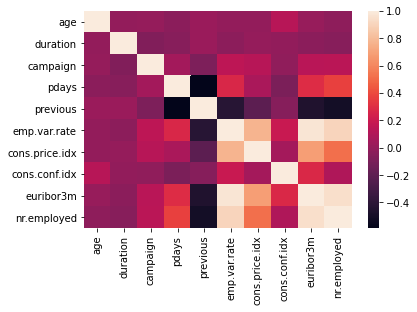

In [11]:
sns.heatmap(data_num.corr())

In [12]:
for i in data_obj.columns:
  print(i)
  print(data_obj[i].value_counts())

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
contact
cellular     26144
telephone    15044
Name: contact, 

In [0]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1,2,3,4,5,6,7,8,9,14])], remainder='passthrough')

In [0]:
data = np.array(columnTransformer.fit_transform(dataset), dtype = np.str)

In [15]:
data.shape

(41188, 64)

In [0]:
encoded_data = pd.DataFrame(data=data[: , :])

In [17]:
encoded_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
X = encoded_data.iloc[:, :63]
y = encoded_data.iloc[:, 63]

In [0]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train.shape)
print(X_test.shape)

(32950, 63)
(8238, 63)


In [0]:
classifier = Sequential()

In [76]:
classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu', input_dim = 63))
#classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu'))
#classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu'))
#classifier.add(Dropout(0.5))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation  = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=63, units=512, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
classifier.fit(X_train, y_train, batch_size=10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
32950/32950 [==============================] - 24s 736us/step - loss: 0.2039 - acc: 0.9066
Epoch 2/100
32950/32950 [==============================] - 24s 724us/step - loss: 0.1883 - acc: 0.9135
Epoch 3/100
32950/32950 [==============================] - 23s 710us/step - loss: 0.1832 - acc: 0.9145
Epoch 4/100
32950/32950 [==============================] - 23s 704us/step - loss: 0.1798 - acc: 0.9176
Epoch 5/100
32950/32950 [==============================] - 22s 681us/step - loss: 0.1746 - acc: 0.9191
Epoch 6/100
32950/32950 [==============================] - 22s 677us/step - loss: 0.1696 - acc: 0.9209
Epoch 7/100
32950/32950 [==============================] - 22s 673us/step - loss: 0.1662 - acc: 0.9221
Epoch 8/100
32950/32950 [==============================] - 22s 672us/step - loss: 0.1613 - acc: 0.9244
Epoch 9/100
32950/32950 [==============================] - 22s 663us/step - loss: 0.1567 - acc: 0.9284
Epoch 10/100
32950/32950 [==============================] - 22s 676us/ste

In [0]:
y_pred = classifier.predict(X_test)

In [80]:
y_pred

array([[0.0000000e+00],
       [0.0000000e+00],
       [8.9406967e-08],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9999607e-01]], dtype=float32)

In [81]:
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu', input_dim = 63))
  #classifier.add(Dropout(0.5))
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu'))
  #classifier.add(Dropout(0.5))
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation  = 'relu'))
  #classifier.add(Dropout(0.5))
  classifier.add(Dense(output_dim = 1, init = 'uniform', activation  = 'sigmoid'))
  classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn=build_classifier,
                             batch_size = 10,
                             epochs = 100
                             )

accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv=10, n_jobs=-1)

KeyboardInterrupt: ignored

In [0]:
accuracies

In [0]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu', input_dim = 63))
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu'))
  classifier.add(Dense(output_dim = 512, init = 'uniform', activation = 'relu'))
  classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
  classifier.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier


classifier = KerasClassifier(build_fn = build_classifier)

params = {'batch_size': [25,32],
          'epochs': [100, 500],
          'optimizer': ['adam', 'rmsprop']}


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_


In [0]:
best_params

In [0]:
best_accuracy